# The code generates synthetic microsatellites of various repeat sizes and combines them into a single dataframe.

# Here are some possible advantages of this data:

Diversity: The synthetic microsatellites are generated randomly, which means they are diverse and not biased towards any particular pattern or sequence.

Control: The user can control the number of microsatellites and the repeat size, which can be helpful in testing or evaluating specific scenarios or hypotheses.

Scalability: The code generates a large number of microsatellites (1000 of each repeat size), which can be useful in testing or training machine learning models that require large datasets.

Labeling: The code generates labels for each microsatellite based on its repeat size, which can be useful in supervised learning tasks.

Preprocessing: The code preprocesses the data by adding random front and back sequences to each microsatellite, which can be helpful in simulating real-world scenarios where the microsatellites are embedded within longer sequences.

Reproducibility: The synthetic microsatellites can be generated anytime with the same code and parameters, ensuring reproducibility of the data for future experiments or analysis.

No privacy concerns: Since the microsatellites are synthetic and not derived from real-world samples, there are no privacy concerns associated with the data.

In [13]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder

def generate_microsatellites(repeat_size, num_microsatellites):
    """
    Generate synthetic microsatellites of a specific repeat size
    """
    microsatellites = []
    for i in range(num_microsatellites):
        repeat_unit = ''.join([random.choice(['A', 'C', 'T', 'G']) for _ in range(repeat_size)])
        repeat_number = random.randint(5, 15)
        microsatellites.append(repeat_unit * repeat_number)
    return microsatellites

# Generate synthetic di, tri, tetra, penta, and hexa microsatellites
di_microsatellites = generate_microsatellites(2, 1000)
tri_microsatellites = generate_microsatellites(3, 1000)
tetra_microsatellites = generate_microsatellites(4, 1000)
penta_microsatellites = generate_microsatellites(5, 1000)
hexa_microsatellites = generate_microsatellites(6, 1000)

# Combine all microsatellites into a single list and add repeat size labels
microsatellites = di_microsatellites + tri_microsatellites + tetra_microsatellites + penta_microsatellites + hexa_microsatellites
repeat_sizes = [2] * 1000 + [3] * 1000 + [4] * 1000 + [5] * 1000 + [6] * 1000

# Create dataframe from microsatellites and repeat sizes
df = pd.DataFrame({'Sequence': microsatellites, 'Repeat Size': repeat_sizes})

front_sequences = []
back_sequences = []

for i in range(len(microsatellites)):
    random_front_length = random.randint(50, 150)
    random_back_length = random.randint(50, 150)
    random_front = ''.join([random.choice(['A', 'C', 'T', 'G']) for _ in range(random_front_length)])
    random_back = ''.join([random.choice(['A', 'C', 'T', 'G']) for _ in range(random_back_length)])
    front_sequences.append(random_front)
    back_sequences.append(random_back)

df['Full Sequence'] = pd.Series(front_sequences) + df['Sequence'] + pd.Series(back_sequences)
df_new = df[['Full Sequence', 'Repeat Size']]



In [14]:
df2 = pd.DataFrame({'Sequence': microsatellites, 'Repeat Size': repeat_sizes})
df2


,Sequence,Repeat Size
0,TGTGTGTGTGTGTGTGTGTGTGTGTGTGTG,2
1,GAGAGAGAGA,2
2,AGAGAGAGAGAGAGAGAGAGAG,2
3,ACACACACAC,2
4,CACACACACACACACACACACACACACACA,2
...,...,...
4995,ATTGATATTGATATTGATATTGATATTGATATTGATATTGATATTG...,6
4996,TTGTAGTTGTAGTTGTAGTTGTAGTTGTAGTTGTAGTTGTAGTTGTAG,6
4997,GGGATAGGGATAGGGATAGGGATAGGGATAGGGATAGGGATAGGGA...,6
4998,CAATGCCAATGCCAATGCCAATGCCAATGCCAATGCCAATGCCAAT...,6


In [15]:
df2.to_csv('microsatellites_table1.csv', index=False)

In [16]:
df_new


,Full Sequence,Repeat Size
0,TTCTGTTCAAATCGTACAGCCATGCTGTTCTGCGAGTTTTAGCTGA...,2
1,AGTGCGTGCTGATCACTAAGATCCCATCCTTAGATCTCTAAATAGC...,2
2,ATACTTGAACTACGCCTTTCGTGGCTGTGCAGTTAATTACTGAGGA...,2
3,CAGGATAGGGAGGAACATTCACTTTTCTACGGATATATGGCCATGA...,2
4,TGCTGGAAACAGTCTTAGCACAGGCGAAAACGAGAGGCTGCCAGCG...,2
...,...,...
4995,TGACTAATTGTAAAATATGGAAATTATCGAGAAGGTATATCGACAT...,6
4996,AAGTAATCGGGGCCGGACACCCCGATAGTGTATACTATGAAGGTAC...,6
4997,AGGGATAGTAATGGCATGGAGCCAGGTCCTTCAGAGGTCCCTCGGT...,6
4998,GGGGGTGTGGGTAATAAGACCCATGAAAAGCTCCAGGGACTAAACT...,6


In [17]:
df_new.to_csv('microsatellites_table2.csv', index=False)

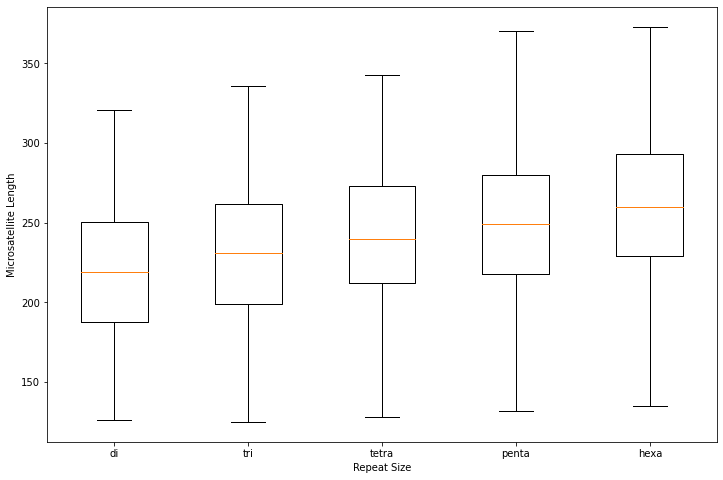

In [18]:
import matplotlib.pyplot as plt

# Create a box plot of the microsatellite length for each repeat size
plt.boxplot([df.loc[df['Repeat Size'] == i, 'Full Sequence'].apply(len) for i in range(2, 7)])
plt.xticks(range(1, 6), ['di', 'tri', 'tetra', 'penta', 'hexa'])
plt.xlabel('Repeat Size')
plt.ylabel('Microsatellite Length')

# Increase size of chart
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Save chart as HD jpg
plt.savefig('microsatellite_lengths.jpg', dpi=300)

plt.show()


In [19]:
# Create a scatter plot of the microsatellite length vs. the repeat size
#plt.scatter(df['Full Sequence'].apply(len), df['Repeat Size'])
#plt.xlabel('Microsatellite Length')
#plt.ylabel('Repeat Size')
#plt.title('Relationship Between Length and Repeat Size')
#plt.show()


In [20]:
#The code generates synthetic microsatellites of various repeat sizes and combines them into a single fasta file
import pandas as pd
import random

def generate_microsatellites(repeat_size, num_microsatellites):
    """
    Generate synthetic microsatellites of a specific repeat size
    """
    microsatellites = []
    repeat_sizes = []
    for i in range(num_microsatellites):
        repeat_unit = ''.join([random.choice(['A', 'C', 'T', 'G']) for _ in range(repeat_size)])
        repeat_number = random.randint(5, 15)
        microsatellites.append(repeat_unit * repeat_number)
        repeat_sizes.append(repeat_size)
    return microsatellites, repeat_sizes


# Generate synthetic di, tri, tetra, penta, and hexa microsatellites
di_microsatellites, di_repeat_sizes = generate_microsatellites(2, 1000)
tri_microsatellites, tri_repeat_sizes = generate_microsatellites(3, 1000)
tetra_microsatellites, tetra_repeat_sizes = generate_microsatellites(4, 1000)
penta_microsatellites, penta_repeat_sizes = generate_microsatellites(5, 1000)
hexa_microsatellites, hexa_repeat_sizes = generate_microsatellites(6, 1000)

# Combine all microsatellites into a single list and add repeat size labels
microsatellites = di_microsatellites + tri_microsatellites + tetra_microsatellites + penta_microsatellites + hexa_microsatellites
repeat_sizes = di_repeat_sizes + tri_repeat_sizes + tetra_repeat_sizes + penta_repeat_sizes + hexa_repeat_sizes

# Create dataframe from microsatellites and repeat sizes
df = pd.DataFrame({'Sequence': microsatellites, 'Repeat Size': repeat_sizes})


front_sequences = []
back_sequences = []

for i in range(len(microsatellites)):
    random_front_length = random.randint(50, 150)
    random_back_length = random.randint(50, 150)
    random_front = ''.join([random.choice(['A', 'C', 'T', 'G']) for _ in range(random_front_length)])
    random_back = ''.join([random.choice(['A', 'C', 'T', 'G']) for _ in range(random_back_length)])
    front_sequences.append(random_front)
    back_sequences.append(random_back)

df['Full Sequence'] = pd.Series(front_sequences) + df['Sequence'] + pd.Series(back_sequences)

fasta_file = 'SSR.fasta'
# Write the sequences to a file in the FASTA format
with open(fasta_file, 'w') as f:
    for index, row in df.iterrows():
        seq = row['Full Sequence']
        repeat_size = row['Repeat Size']
        f.write('>repeat_' + str(index) + '_size_' + str(repeat_size) + '\n')
        f.write(seq + '\n')


In [21]:
df_new['Sequence Length'] = df_new['Full Sequence'].apply(len)


In [22]:
df_new

,Full Sequence,Repeat Size,Sequence Length
0,TTCTGTTCAAATCGTACAGCCATGCTGTTCTGCGAGTTTTAGCTGA...,2,264
1,AGTGCGTGCTGATCACTAAGATCCCATCCTTAGATCTCTAAATAGC...,2,229
2,ATACTTGAACTACGCCTTTCGTGGCTGTGCAGTTAATTACTGAGGA...,2,203
3,CAGGATAGGGAGGAACATTCACTTTTCTACGGATATATGGCCATGA...,2,196
4,TGCTGGAAACAGTCTTAGCACAGGCGAAAACGAGAGGCTGCCAGCG...,2,251
...,...,...,...
4995,TGACTAATTGTAAAATATGGAAATTATCGAGAAGGTATATCGACAT...,6,251
4996,AAGTAATCGGGGCCGGACACCCCGATAGTGTATACTATGAAGGTAC...,6,251
4997,AGGGATAGTAATGGCATGGAGCCAGGTCCTTCAGAGGTCCCTCGGT...,6,238
4998,GGGGGTGTGGGTAATAAGACCCATGAAAAGCTCCAGGGACTAAACT...,6,254
